### What is Feature Engineering?
Feature engineering is the process of using domain knowledge to extract and analyze features from raw data. A feature or column is a property shared by independent units on which analysis or prediction is to be done.Features are used by predictive models and influence results.

### Feature Engineering is an Art.
The data is a variable and is different every time. You get good at deciding which procedures to use and when, by practiceMastery of feature engineering comes with hands-on practice, and study of what others that are doing well are practicing.
Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used.


### Why should we use Feature Engineering in data science or Importance of Feature Engineering?
Feature engineering is useful to improve the performance of machine learning algorithms.Selecting the important features and reducing the size of the feature set makes computation in machine learning and data analytic algorithms more feasible.

In Data Science, the performance of the model is dependent on data preprocessing and data handling. Suppose if we build a model without Handling data, we get an accuracy of around 70%. By applying the Feature engineering on the same model there is a chance to increase the performance from 70% to more.

Simply, by using Feature Engineering we improve the performance of the model.



### Types of Feature Engineering

Handling missing data

Handling imbalanced data

Handling outliers

Feature scaling

Feature encoding

Dimensionality reduction

Feature Transformation

Feature construction

Covariance Check

Correlation Check


### Handling missing value


Missing value in a dataset is a very common phenomenon in reality. For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders.Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements or data unavailability.

Missing value correction is required to reduce bias and to produce powerful suitable models. Most of the algorithms can’t handle missing data, thus you need to act in some way to simply not let your code crash


### Method for handling missing values

1.Filling with Arbitrary value or Replace NaN with a Scalar Value

2.Filing Nan with pad/fill(Fill methods Forward) and bfill/backfill(Fill methods Backward)

3.Drop Missing Values

4.statical method

  mean 

  median 

  mode

5.Capturing NAN values with a new feature

6.End of Distribution imputation

7.using different model(knn imputer) or  Predicting The Missing Values

8.using algorithm that support missing value

### How To Handle Categorical Missing Values

1.with frequent number

2.Adding a variable to capture NAN


In [3]:
#importing data as csv
import pandas as pd
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Filling with Arbitrary value or Replace NaN with a Scalar Value

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [5]:
#cheking missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Checking the info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [17]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [7]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

In [9]:
impute_nan(df,'Age')

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zero,Age_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


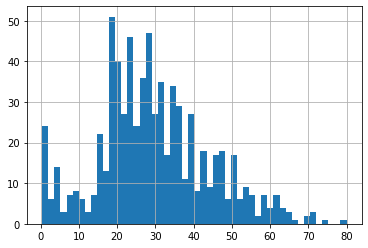

In [18]:
df['Age'].hist(bins=50)

### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

### Filing Nan with pad/fill(Fill methods Forward) and bfill/backfill(Fill methods Backward)

In [20]:
def impute_nan(df,variable):
    df[variable+'_pfill']=df[variable].fillna(method='pad')
    df[variable+'_bfill']=df[variable].fillna(method='backfill')
    

In [21]:
impute_nan(df,'Cabin')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zero,Age_hundred,Cabin_pfill,Cabin_bfill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,NaN,C85
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C85,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,C85,C123
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,C123,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,C123,E46


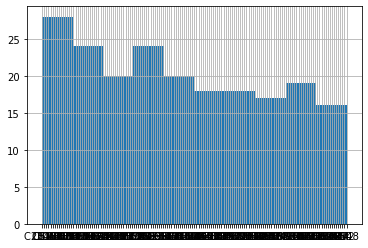

In [38]:
df['Cabin'].hist()

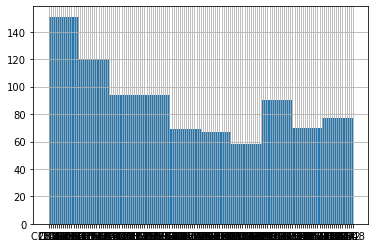

In [31]:
df['Cabin_pfill'].hist()

In [33]:
df["Cabin_pfill"]

0       NaN
1       C85
2       C85
3      C123
4      C123
       ... 
886     C50
887     B42
888     B42
889    C148
890    C148
Name: Cabin_pfill, Length: 891, dtype: object

Notice, values in the first row is still NaN value because there is no row above it from which non-NA value could be propagated

### Advantages

- Easy to implement
- Working fine with small data and less missing values

### Disadvantages

- Distorts the original distribution of the variable
- values in the first row is still NaN value because there is no row above it from which non-NA value could be propagated

### Drop Missing Values
If you want to simply exclude the missing values, then use the dropna function along with the axis argument. By default, axis=0, i.e., along row, which means that if any value within a row is NA then the whole row is excluded.

In [39]:
df1=df.copy()

In [40]:
df1.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zero,Age_hundred,Cabin_pfill,Cabin_bfill
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C85,C85
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,C123,C123
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,54.0,E46,E46
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4.0,4.0,G6,G6
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,58.0,58.0,C103,C103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,47.0,47.0,D35,D35
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,33.0,33.0,B51 B53 B55,B51 B53 B55
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,56.0,56.0,C50,C50
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0,B42,B42


In [41]:
df.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age_zero,Age_hundred
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,0.0,100.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,26.0,26.0


### Advantages
- Easy To implement
- If data is missing for more than given threshold(it may 50% or 60% or 70%)of the observations, it may be wise to discard it if the variable is insignificant.

### Disadvantage
- Its main drawbacks are the reduced statistical power (because it reduces the number of samples n, the estimates will have larger standard errors), waste of information, and possible bias of the analysis specially if data is not MCAR.